In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Siu et al 2004 Gamma Garch Option Pricing

In [12]:
def Y(r,v,a,h,Xt):
    """equation 3.12 siu et al"""
    return r + v*h**0.5 - 0.5* h - (a*h)**0.5 + Xt
def h(omega,alpha,beta,a,ht,Xt):
    """equation 3.13 siu et al"""
    return omega + alpha*(Xt - (a*ht)**0.5)**2 + beta*ht
def htalt(a,v,h):
    """equation 3.14 siu et al"""
    return a**2 * (1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a))
def X(a,b):
    """returns gamma / Xt in siu et al"""
    return np.random.gamma(a, b, 1)[0] 
def b(v,h,a):
    """equation 3.11 in siu et al"""
    return 1/((1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a)))

In [13]:
omega = 0.00003577
alpha = 0.155966
beta = 0.646049
v = 0.04873824 # lambda in siu et al
r = 0.001 # risk free rate r
ht = 1.4 # starting value for variance
a = 4 # shape parameter for gamma distribution
print ("{:<6} {:<6} {:<6} {:<6}".format('bt','Xt','ht', "Yt"))

myb = []
myX = []
myh = []
myY = []

for i in range(25):
    bt = b(v,ht,a)
    Xt = X(a, bt)
    ht = h(omega,alpha,beta,a,ht,Xt)
    #ht = htalt(a,v,ht)
    Yt = Y(r,v,a,ht,Xt)
    print ("{:<6.4f} {:<6.4f} {:<6.4f} {:<6.4f}".format( bt, Xt, ht, Yt))
    myb.append(bt), myX.append(Xt), myh.append(ht), myY.append(Yt) 
    

bt     Xt     ht     Yt    
1.8915 12.2904 16.2648 -3.7104
1.0186 3.8370 13.2972 -9.9259
1.0331 2.5011 12.1722 -10.3917
1.0415 2.2381 11.3674 -10.0234
1.0489 1.7987 11.1569 -10.2963
1.0511 4.4693 7.9705 -5.0238
1.1027 2.0680 7.1464 -6.7205
1.1250 1.8035 6.5749 -6.4863
1.1440 4.1078 4.4102 -2.1940
1.2608 6.1480 3.4410 0.8089
1.3571 5.1239 2.5349 0.7508
1.5038 3.1395 1.6380 -0.1758
1.7745 16.1687 29.9439 -9.4798
1.0016 7.7685 20.9182 -11.6140
1.0079 1.7809 21.9776 -18.3545
1.0066 1.9832 22.7229 -18.6786
1.0057 2.3823 22.6567 -18.2329
1.0058 4.8883 17.9831 -12.3769
1.0135 4.3115 14.3298 -10.2389
1.0270 9.8594 10.0746 -1.3703
1.0642 7.9733 6.9207 -0.6192
1.1321 7.7946 5.4719 0.4952
1.1922 1.3971 5.2144 -5.6648
1.2064 6.5760 3.9983 0.6762
1.2966 5.1669 2.7958 0.5074


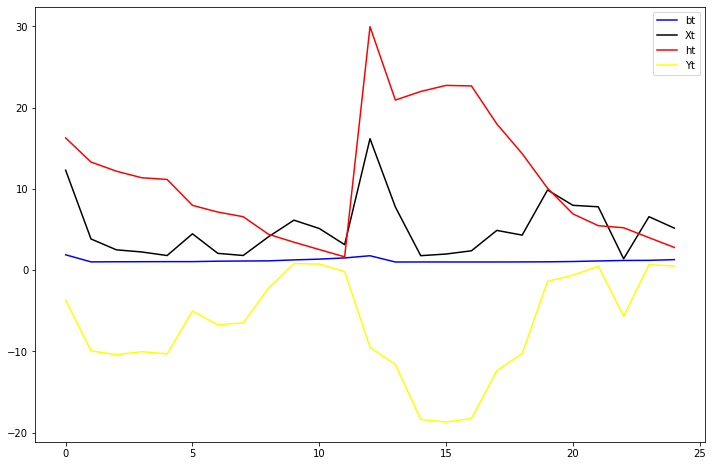

In [14]:
plt.figure(figsize = (12,8))
plt.subplot(111)
plt.plot(myb, color = "blue", label = "bt")
plt.plot(myX, color = "black", label = "Xt")
plt.plot(myh, color = "red", label = "ht")
plt.plot(myY, color = "yellow", label = "Yt")
plt.legend()